In [15]:
from ase import Atom
from ase import Atoms
from ase.io import read,write
from ase.calculators.emt import EMT
from ase.constraints import FixAtoms, Hookean
from ase.build import fcc110
from ase.visualize import view

from ase.optimize.minimahopping import MinimaHopping

In [17]:
# struture
atoms = fcc110('Pt', (2,2,2), vacuum=7)
# view(atoms)

# Cu adsorbates
adsorbate = Atoms([Atom('Cu', atoms[7].position+(0,0,2.5)),
                   Atom('Cu', atoms[7].position+(0,0,5))])
atoms.extend(adsorbate)
# view(atoms)

# constraint atoms
# Hooken的用法可以看ase官网
constraints = [FixAtoms(indices=[atom.index for atom in atoms if atom.symbol=="pt"]),
                       Hookean(a1=8, a2=9, rt=2.6, k=15), # 对于第9个和第10个原子，如果他们之间的距离超过2.6，会有一个拉力防止他们远离
                       Hookean(a1=8, a2=(0,0,1,-15), k=15)] # 对于9个原子，如果在z轴上的距离超过15，则有一个restorative force防止其继续远离
atoms.constraints = constraints

# calc
atoms.calc = EMT()

# 
hop = MinimaHopping(atoms, Ediff0=2.5, T0=4000)
hop(totalsteps=20)

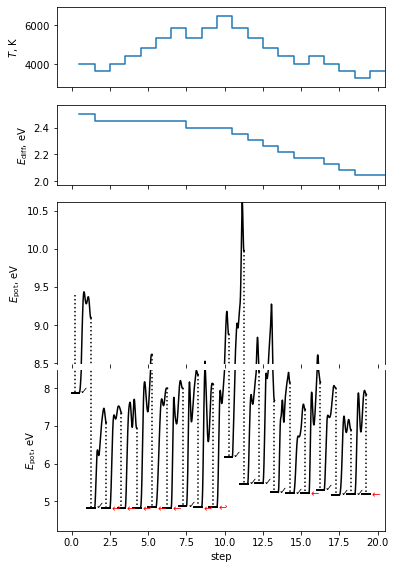

In [18]:
from ase.optimize.minimahopping import MHPlot
mhplot = MHPlot()
mhplot.save_figure("sum.png")